In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.simplefilter("ignore")

In [68]:
df = pd.read_csv("../presample_thoughts.tsv", delimiter = "\t", error_bad_lines=False)

b'Skipping line 1943: expected 16 fields, saw 17\nSkipping line 1944: expected 16 fields, saw 17\nSkipping line 2001: expected 16 fields, saw 17\nSkipping line 2003: expected 16 fields, saw 17\nSkipping line 2040: expected 16 fields, saw 17\nSkipping line 14573: expected 16 fields, saw 17\nSkipping line 17079: expected 16 fields, saw 27\nSkipping line 19909: expected 16 fields, saw 24\nSkipping line 20893: expected 16 fields, saw 33\nSkipping line 21694: expected 16 fields, saw 23\nSkipping line 22753: expected 16 fields, saw 20\nSkipping line 31116: expected 16 fields, saw 17\nSkipping line 31129: expected 16 fields, saw 17\nSkipping line 31130: expected 16 fields, saw 17\nSkipping line 31131: expected 16 fields, saw 17\nSkipping line 31203: expected 16 fields, saw 17\nSkipping line 31319: expected 16 fields, saw 17\nSkipping line 31405: expected 16 fields, saw 17\n'
b'Skipping line 34494: expected 16 fields, saw 17\nSkipping line 35799: expected 16 fields, saw 17\nSkipping line 35854

In [69]:
df 

,id,is_top_level,text,tag,is_thought_blocked,is_anon,has_trigger_warning,has_profile_pic,has_cover_image,has_pronouns,is_banned,has_google,has_phone,has_apple,bio,has_location
0,5e8b3ddf492d791d4894c1bd,1,"I have chronic seasonal allergies, which means...",physical-health,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1,0.0,here for the vibes 🛼✨þ& as a nowandme user🕺🏻,0.0
1,5e8b3ddf492d791d4894c1bf,1,I was scared of dogs for most part of my life....,women-empowerment,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1,0.0,here for the vibes 🛼✨þ& as a nowandme user🕺🏻,0.0
2,5e8b3ddf492d791d4894c1c1,1,I have always been a very sensitive person so ...,relationships,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1,0.0,here for the vibes 🛼✨þ& as a nowandme user🕺🏻,0.0
3,5e8b3ddf492d791d4894c1c3,1,"I’m 20 years old and thus far, my personal lif...",other,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1,0.0,here for the vibes 🛼✨þ& as a nowandme user🕺🏻,0.0
4,5e8b3ddf492d791d4894c1c5,1,Some of our professors fail to understand the ...,education,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1,0.0,here for the vibes 🛼✨þ& as a nowandme user🕺🏻,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546336,621aa2b2af7766001d2efc9a,0,Love is something that stays with you. A part ...,breakup,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,0,0.0
546337,621aa305624bb6001c87439f,0,I’m there you if want to talk :),lonely,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,0,0.0
546338,621aa31956f131001db69f3a,0,Awww. I would like that...,lonely,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0.0,"I love people, and I do have separation anxiet...",1.0
546339,621aa33a56f131001db6a07a,0,"Interested in Intraday, F&O ??",success,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,0.0,Entrepreneur,0.0


In [70]:
df.columns

Index(['id', 'is_top_level', 'text', 'tag', 'is_thought_blocked', 'is_anon',
       'has_trigger_warning', 'has_profile_pic', 'has_cover_image',
       'has_pronouns', 'is_banned', 'has_google', 'has_phone', 'has_apple',
       'bio', 'has_location'],
      dtype='object')

In [71]:
df = df[(df["is_top_level"]==0) | (df["is_top_level"]==1) | (df["is_top_level"]=='0') | (df["is_top_level"]=='1')]

In [72]:
len(df)

546313

In [73]:
df.isna().sum()

id                     0
is_top_level           0
text                   0
tag                    4
is_thought_blocked     6
is_anon                6
has_trigger_warning    6
has_profile_pic        6
has_cover_image        6
has_pronouns           6
is_banned              6
has_google             6
has_phone              6
has_apple              6
bio                    6
has_location           6
dtype: int64

In [74]:
df.dropna(inplace=True)

In [75]:
len(df)

546307

In [76]:
# type defs
df.is_top_level = df.is_top_level.astype(int)
df.is_thought_blocked = df.is_thought_blocked.astype(int)
df.is_anon = df.is_anon.astype(int)
df.has_trigger_warning = df.has_trigger_warning.astype(int)
df.has_profile_pic = df.has_profile_pic.astype(int)
df.has_cover_image = df.has_cover_image.astype(int)
df.has_pronouns = df.has_pronouns.astype(int)
df.is_banned = df.is_banned.astype(int)
df.has_phone = df.has_phone.astype(int)
df.has_google = df.has_google.astype(int)
df.has_apple = df.has_apple.astype(int)
df.has_location = df.has_location.astype(int)

In [77]:
len(df.tag.unique())

163

In [78]:
df.is_thought_blocked.value_counts()

0    539857
1      6450
Name: is_thought_blocked, dtype: int64

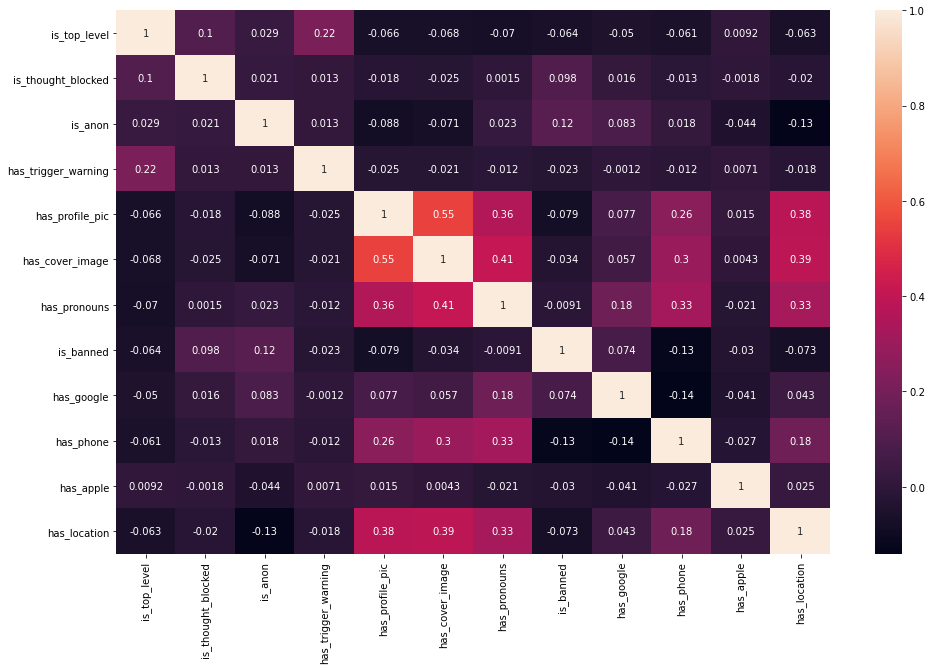

In [79]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [80]:
(df.is_thought_blocked.value_counts()[1.0]/len(df))*100
## Extreme bias

1.1806548332714022

In [81]:
len(df)

546307

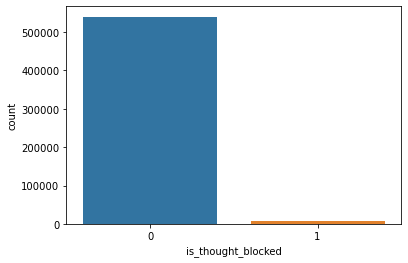

In [82]:
sns.countplot(df.is_thought_blocked)
plt.show()

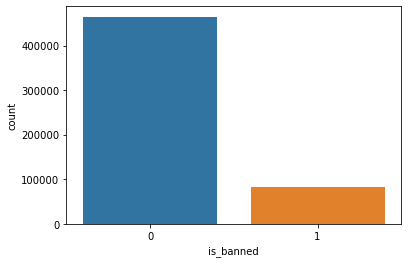

In [85]:
sns.countplot(df.is_banned)
plt.show()

In [83]:
df

,id,is_top_level,text,tag,is_thought_blocked,is_anon,has_trigger_warning,has_profile_pic,has_cover_image,has_pronouns,is_banned,has_google,has_phone,has_apple,bio,has_location
0,5e8b3ddf492d791d4894c1bd,1,"I have chronic seasonal allergies, which means...",physical-health,0,0,0,1,1,1,0,1,1,0,here for the vibes 🛼✨þ& as a nowandme user🕺🏻,0
1,5e8b3ddf492d791d4894c1bf,1,I was scared of dogs for most part of my life....,women-empowerment,1,0,0,1,1,1,0,1,1,0,here for the vibes 🛼✨þ& as a nowandme user🕺🏻,0
2,5e8b3ddf492d791d4894c1c1,1,I have always been a very sensitive person so ...,relationships,0,0,0,1,1,1,0,1,1,0,here for the vibes 🛼✨þ& as a nowandme user🕺🏻,0
3,5e8b3ddf492d791d4894c1c3,1,"I’m 20 years old and thus far, my personal lif...",other,0,0,0,1,1,1,0,1,1,0,here for the vibes 🛼✨þ& as a nowandme user🕺🏻,0
4,5e8b3ddf492d791d4894c1c5,1,Some of our professors fail to understand the ...,education,0,1,0,1,1,1,0,1,1,0,here for the vibes 🛼✨þ& as a nowandme user🕺🏻,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546336,621aa2b2af7766001d2efc9a,0,Love is something that stays with you. A part ...,breakup,0,1,0,0,0,0,0,1,0,1,0,0
546337,621aa305624bb6001c87439f,0,I’m there you if want to talk :),lonely,0,1,0,0,0,0,0,1,0,1,0,0
546338,621aa31956f131001db69f3a,0,Awww. I would like that...,lonely,0,0,0,1,1,1,0,1,0,0,"I love people, and I do have separation anxiet...",1
546339,621aa33a56f131001db6a07a,0,"Interested in Intraday, F&O ??",success,0,0,0,1,1,1,0,0,1,0,Entrepreneur,0


In [84]:
df.to_csv("../thoughts.csv", index=False)

In [86]:
## Problem statement 1: To form clusters of similar posts

In [87]:
## Problem Statement 2: To predict if the thought is blocked

In [88]:
## Problem statement 3: To predict if the user is banned

In [89]:
## Problem statement 4: To predict labels (166, granular - or do a coarse grouping)

In [91]:
546307/df.bio.nunique()

367.38870208473435

In [93]:
## Model imports
from sklearn.metrics import precision_recall_fscore_support

In [96]:
# majority class baseline
maj_preds = np.array([0]*len(df))
# for banned users
print(f"For banned users: {precision_recall_fscore_support(df.is_banned.values, maj_preds, average='macro')}")

# for blocked thoughts
print(f"For blocked thoughts: {precision_recall_fscore_support(df.is_thought_blocked.values, maj_preds, average='macro')}")

For banned users: (0.4252041434577994, 0.5, 0.4595787280725618, None)
For blocked thoughts: (0.494096725833643, 0.5, 0.4970308351225045, None)


In [97]:
# purely categorical classification
from sklearn.ensemble import RandomForestClassifier as RFClassifier

ds_train = df.sample(frac=0.85)
ds_test = df.drop(ds_train.index)

classifier = RFClassifier()

In [117]:
classifier.fit(ds_train[[
        'is_top_level',
        'is_anon',
        'has_trigger_warning',
        'has_profile_pic',
        'has_cover_image',
        'has_pronouns',
#         'is_thought_blocked',
        'has_google',
        'has_phone',
        'has_apple',
        'has_location'
    ]].values,
    ds_train['is_thought_blocked'].values
)

RandomForestClassifier()

In [118]:
blocked_preds = classifier.predict(ds_test[[
        'is_top_level',
        'is_anon',
        'has_trigger_warning',
        'has_profile_pic',
        'has_cover_image',
        'has_pronouns',
#         'is_thought_blocked',
        'has_google',
        'has_phone',
        'has_apple',
        'has_location'
    ]].values)

In [119]:
print(f"Random Forest for blocked thoughts: {precision_recall_fscore_support(ds_test['is_thought_blocked'].values, blocked_preds, average='macro')}")

Random Forest for blocked thoughts: (0.49383122826285925, 0.4999938222030024, 0.4968934184675835, None)


In [120]:
# Encoding thoughts

from transformers import AutoModel, AutoTokenizer

model = AutoModel.from_pretrained("vinai/bertweet-base")
tokenizer = AutoTokenizer.from_pretrained("vinai/bertweet-base")

Some weights of the model checkpoint at vinai/bertweet-base were not used when initializing RobertaModel: ['lm_head.decoder.bias', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


emoji is not installed, thus not converting emoticons or emojis into text. Please install emoji: pip3 install emoji
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
embeddings = []
def encode_text(text, tokenizer, model, device):
    tokens = tokenizer.encode_plus(text, add_special_tokens=True)
    embedding = model(**tokens)['pooler_output'].squeeze()
    embeddings.append(embedding.cpu().numpy())
np.save("encoding.npy", np.array(embeddings))

In [150]:
t = tokenizer("[CLS] This is a sample thought [SEP] Second sentence", return_tensors="pt", add_special_tokens=False)

In [151]:
t

{'input_ids': tensor([[61658,  6411,   381,   317,   126,    17,    11, 10432,   307, 61658,
          3054,   418,   317,  3271,  5199]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

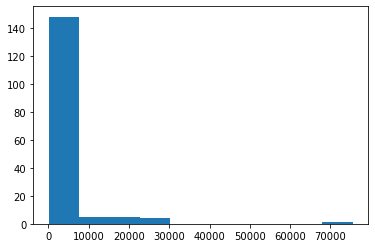

In [158]:
plt.hist(df.tag.value_counts())
plt.show()

In [ ]:
print(df.tag.values.mean())
print(df.tag.values.median())
print(df.tag.values.std())

In [ ]:
print(df.tag.quantile(0.1))
print(df.tag.quantile(0.9))

In [166]:
df.is_top_level.value_counts()

0    480538
1     65769
Name: is_top_level, dtype: int64

In [167]:
df

,id,is_top_level,text,tag,is_thought_blocked,is_anon,has_trigger_warning,has_profile_pic,has_cover_image,has_pronouns,is_banned,has_google,has_phone,has_apple,bio,has_location
0,5e8b3ddf492d791d4894c1bd,1,"I have chronic seasonal allergies, which means...",physical-health,0,0,0,1,1,1,0,1,1,0,here for the vibes 🛼✨þ& as a nowandme user🕺🏻,0
1,5e8b3ddf492d791d4894c1bf,1,I was scared of dogs for most part of my life....,women-empowerment,1,0,0,1,1,1,0,1,1,0,here for the vibes 🛼✨þ& as a nowandme user🕺🏻,0
2,5e8b3ddf492d791d4894c1c1,1,I have always been a very sensitive person so ...,relationships,0,0,0,1,1,1,0,1,1,0,here for the vibes 🛼✨þ& as a nowandme user🕺🏻,0
3,5e8b3ddf492d791d4894c1c3,1,"I’m 20 years old and thus far, my personal lif...",other,0,0,0,1,1,1,0,1,1,0,here for the vibes 🛼✨þ& as a nowandme user🕺🏻,0
4,5e8b3ddf492d791d4894c1c5,1,Some of our professors fail to understand the ...,education,0,1,0,1,1,1,0,1,1,0,here for the vibes 🛼✨þ& as a nowandme user🕺🏻,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546336,621aa2b2af7766001d2efc9a,0,Love is something that stays with you. A part ...,breakup,0,1,0,0,0,0,0,1,0,1,0,0
546337,621aa305624bb6001c87439f,0,I’m there you if want to talk :),lonely,0,1,0,0,0,0,0,1,0,1,0,0
546338,621aa31956f131001db69f3a,0,Awww. I would like that...,lonely,0,0,0,1,1,1,0,1,0,0,"I love people, and I do have separation anxiet...",1
546339,621aa33a56f131001db6a07a,0,"Interested in Intraday, F&O ??",success,0,0,0,1,1,1,0,0,1,0,Entrepreneur,0


In [169]:
df.to_csv("thoughts.tsv", sep="\t")

In [ ]:
# birch clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot

# define dataset
X, _ = make_classification(n_samples=500000, n_features=780, n_informative=10, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = Birch(threshold=0.01, n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()